## **Project 9 - Natural Language Processing**

### **Title**: *Twitter US Airline Sentiment*

### **Author**: *Pankaj Singh*

<br>

**Domain** 

Natural Language Processing

**Project Context**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Data Description** 

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

**Learning Objective**

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model. 
- Evaluate the Model

**Overview of the problem**

- This task involves, identifying the sentiment of the tweet about the airline based on its content. In tweets with negative sentiment, a reason for the negative sentiment is provided but it is not always the case.
- We will be basing our sentiment detection based on the tweet
- We will be using various EDA tools to develope a better picture of the tweet sentiments based on airline, day of the week, time of the day etc.
- This will be followed by tweet cleanup and getting it ready for NLP analysis
- We will be using two different vectorizers
    - Count Vectorizer
    - TF-IDF Vectorizer
- We will be analyzing the vectorized tweets with Random Forest and XGBoost algorithms

## **Import Libraries**

In [128]:
# install and import necessary libraries.

# Used to process date and time
from datetime import datetime                          

# Import libraries for wordcloud
import wordcloud

# Import libraries for loading images
from PIL import Image

# count the key-value pairs in an object
from collections import Counter                         

# Used for plotting
import matplotlib.pyplot as plt                         
import seaborn as sns                                   

# Import Regex, string and unicodedata.
import re, string, unicodedata      

# Import contractions library.
import contractions            

# Import BeautifulSoup.
from bs4 import BeautifulSoup                           

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

pd.set_option('display.max_colwidth', None)             # Display full dataframe information (Non-turncated Text column.)


# Import libraries for word vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load label encoder
from sklearn.preprocessing import LabelEncoder

# Load libraries to do data splitting
from sklearn.model_selection import train_test_split

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import performance metric tools
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /home/mopsie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mopsie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mopsie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mopsie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## **Reading the dataset**

In [2]:
# Load the tweets data file
data=pd.read_csv('Tweets.csv')

## **Overview of the dataset**

- ### Dataset shape

In [3]:
## Print the shape of dataset
print('Tweet dataset shape =',data.shape)

Tweet dataset shape = (14640, 15)


- There are 14640 tweets in the dataset

- ### Display the top 5 layers of the dataset

In [4]:
## Get a glimpse into new dataframe ##
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


- ### Get information on missing data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- As we can see that there are 15 columns in this data set, and not all of them are going to be useful for our analysis. So we will drop following columns from our dataset as they do not add value or we do not know how to interpret them,
1. tweet_id
2. airline_sentiment_confidence
3. negativereason_confidence
4. airline_sentiment_gold
5. name
6. negativereason_gold
7. tweet_coord
8. tweet_location
9. user_timezone


In [6]:
## Drop columns that do not add value
data.drop(['tweet_id','airline_sentiment_confidence',
           'negativereason_confidence','airline_sentiment_gold', 
           'name', 'negativereason_gold', 'tweet_coord', 
           'tweet_location', 'user_timezone'],
          axis=1,inplace=True)
data.shape

(14640, 6)

- ### Missing Value analysis

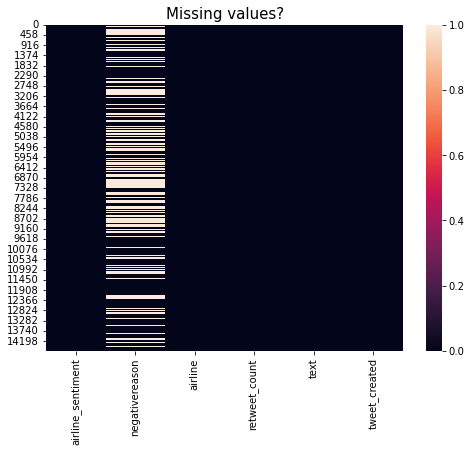


 The number of missing values in each of the columns is as follows:



airline_sentiment       0
negativereason       5462
airline                 0
retweet_count           0
text                    0
tweet_created           0
dtype: int64

In [7]:
## Visualize the missing values
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

## Print out the number of missing values

print("\n The number of missing values in each of the columns is as follows:\n")
data.isna().sum()

- Based on the above plot, we can say as there are many of missing values in "negativereason" column, which is okay as sometimes it is quite likely that "postive" sentiment tweets do not have a negative sentiment

- We are keeping the tweet_created column to see if we can find any information about the day of the week and time of the data it was created and it's correlation with sentiment

- ### Taking a look at our dataset after removing extra columns

In [8]:
## Get a glimpse into new dataframe ##
data.head(5)

,airline_sentiment,negativereason,airline,retweet_count,text,tweet_created
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,2015-02-24 11:15:48 -0800
3,negative,Bad Flight,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",2015-02-24 11:15:36 -0800
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing about it,2015-02-24 11:14:45 -0800


## **Data pre-processing**

- ### Extracting the day of the week and hours of the day from the tweet_created column

In [9]:
## Create empty arrays for day of the week and hour of the day ##
day=[]
hour=[]

## Loop over tweet_created time stamp to break it down into day of the week and time of the day
for x in data['tweet_created']:
    day.append(datetime.strptime(x.split(' ')[0], '%Y-%m-%d').strftime('%A'))
    hour.append(int(x.split(' ')[1].split(':')[0]))

## Append the day of the week and time of the day into the dataset ##
data['day']=day
data['hour']=hour

## Drop the tweet_created column
data.drop(['tweet_created'],axis=1,inplace=True)

## Get a glimpse into new dataframe ##
data.head(5)

,airline_sentiment,negativereason,airline,retweet_count,text,day,hour
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,Tuesday,11
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.,Tuesday,11
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,Tuesday,11
3,negative,Bad Flight,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Tuesday,11
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing about it,Tuesday,11


- Here we have added two new columns: The day of the week when tweet was created and what hour of the day it was created

- ### Text pre-processing

- #### Removing hashtags, special characters, links, punctuations, numbers and converting text to lower case

In [10]:
def clean_text(txt):
    
    """
    removing all hashtags , punctuations, and links 
    """
    ## Convert text to lower case
    txt = txt.lower()
    
    ## remove hashtags
    txt = re.sub(r"(@\S+)", "", txt)  
    
    ## remove punctuations 
    txt = txt.translate(str.maketrans('', '', string.punctuation)) 
    
    ## Substituting multiple spaces with single space
    txt = re.sub(r'\s+', ' ', txt, flags=re.I)
    
    ## remove links
    txt = re.sub(r"(http\S+|http)", "", txt)  
    
    ## remove digits
    txt = re.sub(r'\d+', '', txt)
    
    ## Replace contractions
    txt = contractions.fix(txt)
    return txt

## Create a clean text column and store it
data['cleaned_text'] = data['text'].apply(clean_text)

## Get a glimpse into new dataframe ##
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,day,hour,cleaned_text
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,Tuesday,11,what said
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.,Tuesday,11,plus you have added commercials to the experience tacky
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,Tuesday,11,i did not today must mean i need to take another trip
3,negative,Bad Flight,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Tuesday,11,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing about it,Tuesday,11,and its a really big bad thing about it


- Here we have 
    - converted all the text to lower case
    - removed all the @ mentions
    - removed all the punctuations
    - if any multiple spaces, replaced with single space
    - removed any hyperlinks
    - removed any numerical entities
    - replace contractions    

- #### Tokenize the tweet data

In [11]:
data['token'] = data.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1) # Tokenization of data
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,day,hour,cleaned_text,token
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,Tuesday,11,what said,"[what, said]"
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.,Tuesday,11,plus you have added commercials to the experience tacky,"[plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,Tuesday,11,i did not today must mean i need to take another trip,"[i, did, not, today, must, mean, i, need, to, take, another, trip]"
3,negative,Bad Flight,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Tuesday,11,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]"
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing about it,Tuesday,11,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]"


- Here we have tokenized the processed tweets

- #### Stopwords list for removal

In [12]:
## Download the english stopwords list
stopword = stopwords.words('english')

## make a list for stopwords that will be helpful in finding the sentiment
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',"don't",
              "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
              "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "aren't", "ain",
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopword = list(set(stopword) - set(customlist)) 
print(stopword)

['on', 'under', 'before', 'myself', 'out', 'having', 'our', 'a', 'any', 're', 'they', 'couldn', 'as', 'but', 'o', 've', 'same', 'through', 'yourself', 'itself', 'were', 'ourselves', 'during', 'other', 'those', 'm', 'both', 'more', 'that', 'yourselves', 'the', 'over', 'your', 'y', 'his', 'who', 'to', 'was', 'do', 'too', 'him', 'does', 'each', 'once', 'herself', 'you', 'ours', 'only', "you'd", 'than', 'here', 'nor', 'll', 'with', 'did', 'can', 'me', 'them', 'few', 'if', 'there', 'will', 'just', 'for', 'yours', 'and', 'because', 'then', 'been', "you've", 'it', 'their', "she's", 'below', 'd', 'against', "it's", "you'll", 'am', 'are', 'why', 'themselves', 'her', 'is', 'further', "should've", 'have', 'which', 'be', 'my', 'how', 'very', 'himself', 'should', 'down', 'own', 'its', 'has', 'when', 'off', 'between', 'doing', 'now', 'or', 'hers', 'of', 'so', 'an', 'whom', 'until', 'up', 'where', 'such', 'at', 'after', 'most', 'don', 'aren', 'into', "you're", 'what', 'all', 'in', 'theirs', 'we', 'sh

- Here we removed the stopwords but made sure to not remove the negative stopwords

- #### Removing non-ascii and stopwords and lemmatization

In [136]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)
#     return words 

data['summary'] = data.apply(lambda row: normalize(row['token']), axis=1)
data['summary_token'] = data['summary'].str.split(' ')
data.head()

,airline_sentiment,negativereason,airline,retweet_count,text,day,hour,cleaned_text,token,summary,summary_token
0,neutral,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,Tuesday,11,what said,"[what, said]",say,[say]
1,positive,NaN,Virgin America,0,@VirginAmerica plus you've added commercials to the experience... tacky.,Tuesday,11,plus you have added commercials to the experience tacky,"[plus, you, have, added, commercials, to, the, experience, tacky]",plus add commercials experience tacky,"[plus, add, commercials, experience, tacky]"
2,neutral,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,Tuesday,11,i did not today must mean i need to take another trip,"[i, did, not, today, must, mean, i, need, to, take, another, trip]",not today must mean need take another trip,"[not, today, must, mean, need, take, another, trip]"
3,negative,Bad Flight,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Tuesday,11,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]",really aggressive blast obnoxious entertainment guests face amp little recourse,"[really, aggressive, blast, obnoxious, entertainment, guests, face, amp, little, recourse]"
4,negative,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing about it,Tuesday,11,and its a really big bad thing about it,"[and, its, a, really, big, bad, thing, about, it]",really big bad thing,"[really, big, bad, thing]"


- Here we have,
    - removed any non-ascii characters
    - removed stopwords
    - lemmatozed words
    - assembled the processed token list into a string

- #### Create overall wordcloud

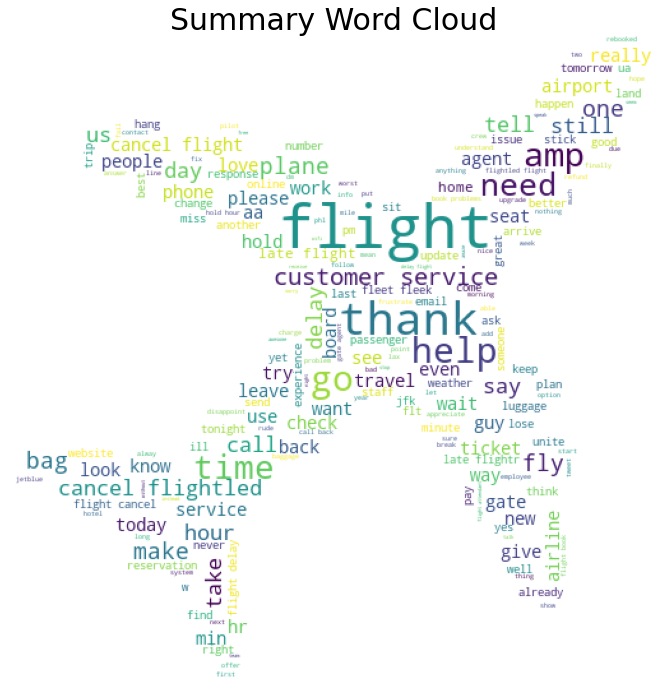

In [14]:
## Create a function to show wordcloud
def show_wordcloud(data, title, colormap):
    text = ' '.join(data['summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    mask = np.array(Image.open('commercialplane.jpg'))
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap=colormap, width=800, height=600, mask=mask).generate(text)
    
    plt.figure(figsize=(16,12), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

show_wordcloud(data,'Summary Word Cloud', 'viridis')

## **Exploratory Data Analysis** 

- #### Value counts of sentiments

In [15]:
for value in ['airline_sentiment', 'airline', 'day', 'hour', 'retweet_count']:
    print('Number of occurences for each value in', value)
    print(data[value].value_counts())
    print()

Number of occurences for each value in airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Number of occurences for each value in airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Number of occurences for each value in day
Sunday       3079
Monday       3032
Tuesday      2752
Saturday     1557
Friday       1500
Thursday     1376
Wednesday    1344
Name: day, dtype: int64

Number of occurences for each value in hour
9     1013
11     986
10     962
14     927
8      926
13     900
12     824
15     788
7      776
17     754
18     751
16     734
19     675
6      621
20     602
5      477
21     430
4      368
22     292
3      225
23     193
2      174
0      131
1      111
Name: hour, dtype: int64

Number of occurences for each value in retweet_count
0     13873
1       640
2        66
3        22
4        1

- #### Sentiment distirbution

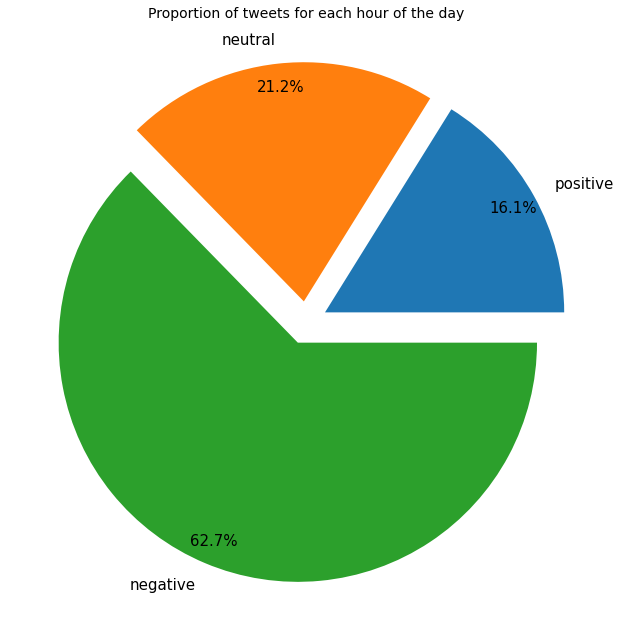

In [149]:
Category=data['airline_sentiment'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*3, labels=labels, 
        pctdistance=0.9, textprops = {'fontsize':15})
plt.title("Proportion of tweets for each hour of the day", fontsize=14);

- #### Airline distribution

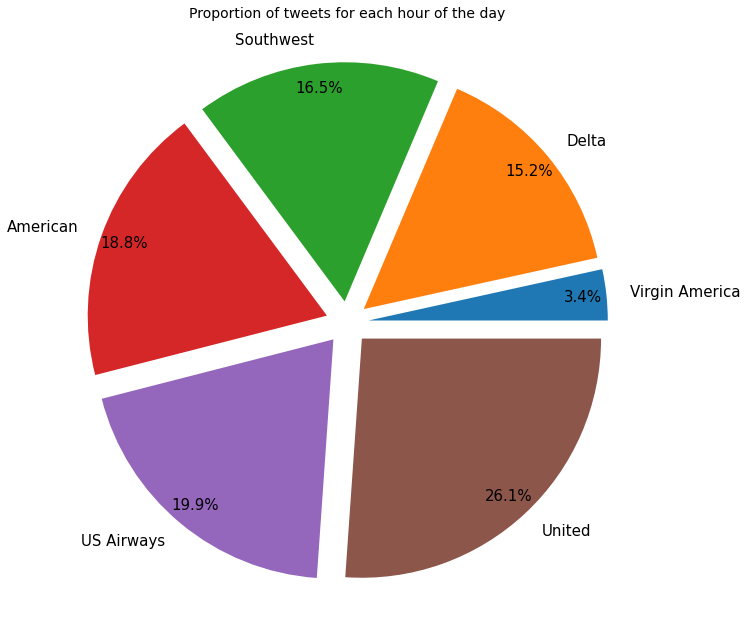

In [148]:
Category=data['airline'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*6, labels=labels, 
        pctdistance=0.9, textprops = {'fontsize':15})
plt.title("Proportion of tweets for each hour of the day", fontsize=14);

- #### Most active hour on twitter

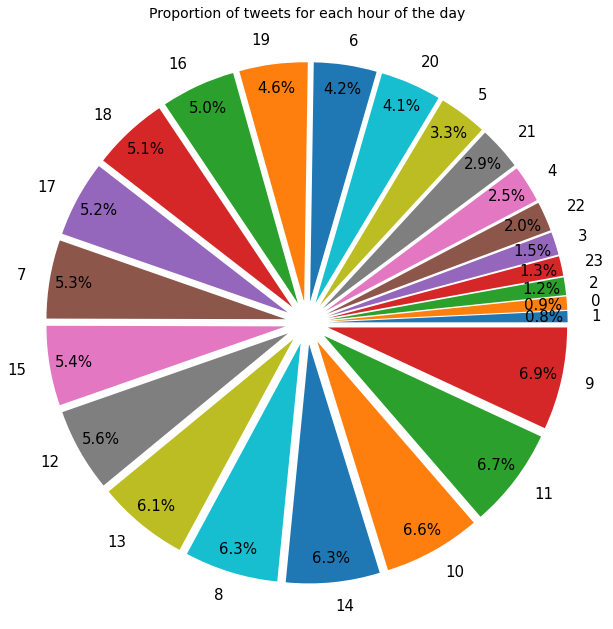

In [16]:
Category=data['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, 
        pctdistance=0.9, textprops = {'fontsize':15})
plt.title("Proportion of tweets for each hour of the day", fontsize=14);

- #### Most day of the week on twitter

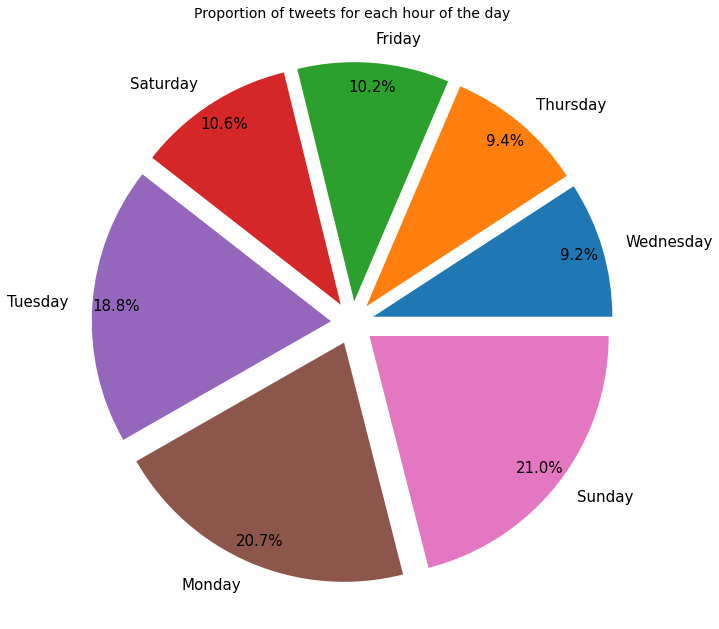

In [17]:
Category=data['day'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*7, labels=labels, 
        pctdistance=0.9, textprops = {'fontsize':15})
plt.title("Proportion of tweets for each hour of the day", fontsize=14);

- Majority tweets in the data are negative, followed by neutral and positive tweets
- Majoirty tweets are for United airlines, followed by US airways and then by American
- 4 most active days of tweeting are Sunday, Monday, Tuesday and Saturday
- As we can see that 60% of tweets happen in the 8AM - 3PM 
    - Rest of the 25% tweet happen between 8PM - 6AM and and 15% happen between 4PM - 7PM 
- Majority tweets do not get retweeted

- #### Target (sentiment) based distribution of features

In [18]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[0]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    
    
    
    fig, ax = plt.subplots(figsize=[10,8])
    sns.countplot(x=predictor,
                  hue=target, 
                  data=data, ax=ax)
    plt.show()
    print("-" * 80)
    

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
United                 2633      697       492   3822
US Airways             2263      381       269   2913
American               1960      463       336   2759
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
Virgin America          181      171       152    504


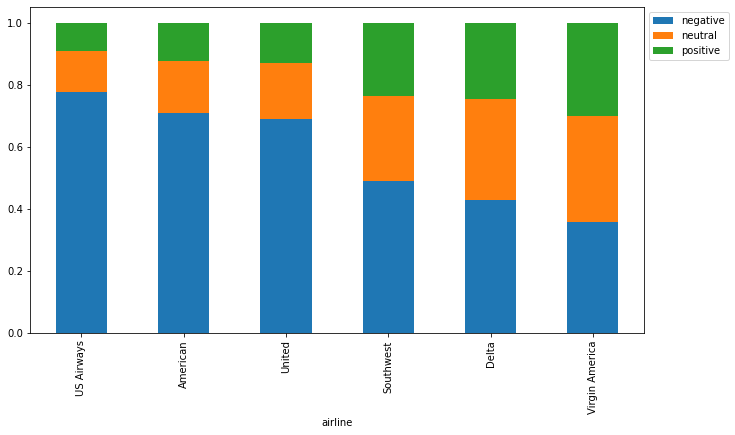

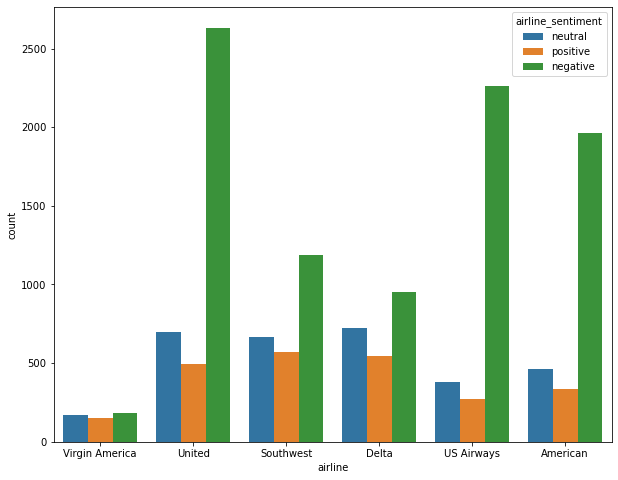

--------------------------------------------------------------------------------
airline_sentiment  negative  neutral  positive    All
day                                                  
All                    9178     3099      2363  14640
Sunday                 2266      463       350   3079
Monday                 1922      677       433   3032
Tuesday                1619      634       499   2752
Saturday               1049      278       230   1557
Friday                  835      383       282   1500
Thursday                751      329       296   1376
Wednesday               736      335       273   1344


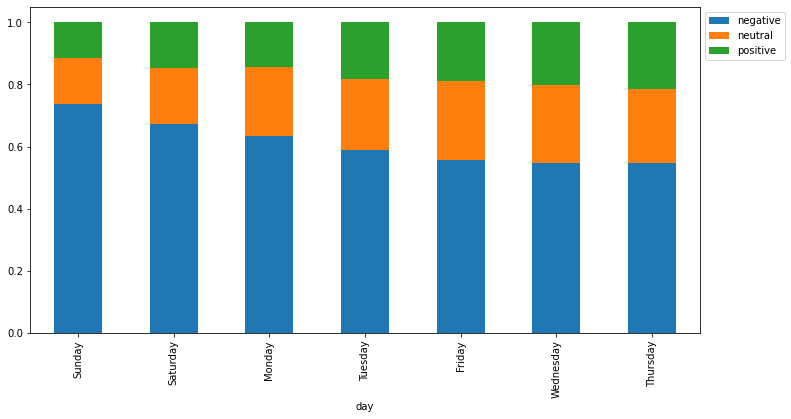

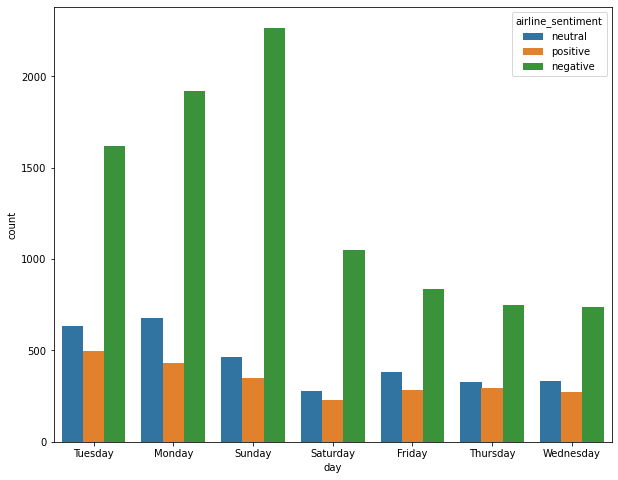

--------------------------------------------------------------------------------
airline_sentiment  negative  neutral  positive    All
hour                                                 
All                    9178     3099      2363  14640
9                       617      217       179   1013
14                      585      200       142    927
11                      572      260       154    986
13                      560      190       150    900
8                       556      212       158    926
10                      543      239       180    962
15                      499      161       128    788
12                      485      197       142    824
19                      482      102        91    675
18                      477      143       131    751
7                       475      170       131    776
16                      463      152       119    734
17                      451      161       142    754
6                       395      124       102    621
2

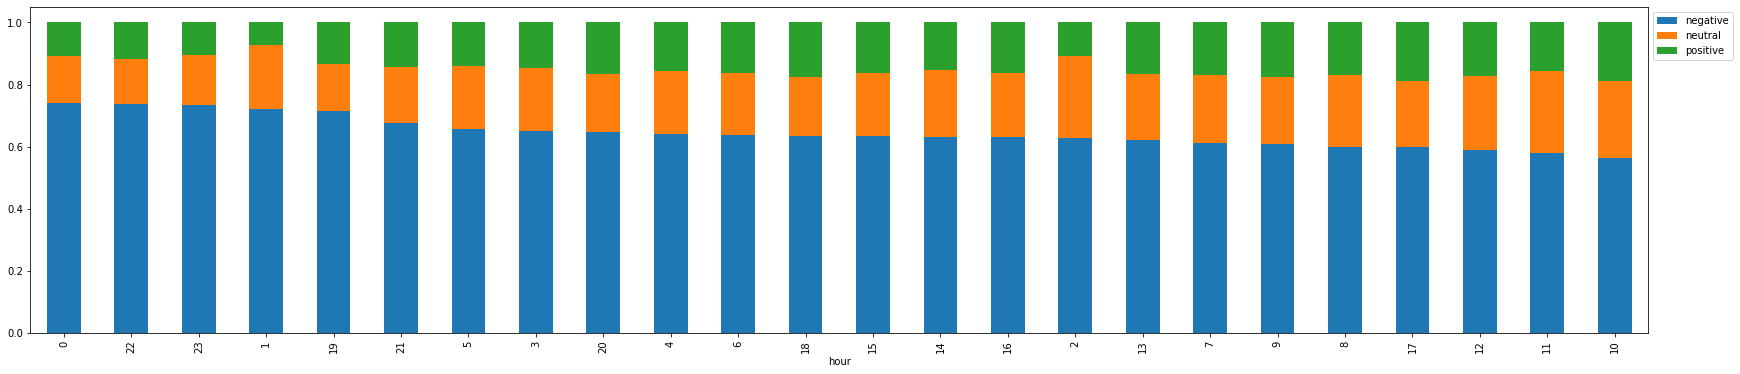

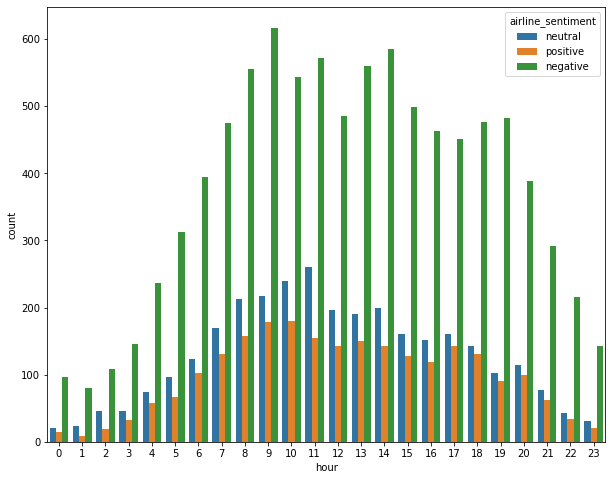

--------------------------------------------------------------------------------
airline_sentiment  negative  neutral  positive    All
retweet_count                                        
All                    9178     3099      2363  14640
0                      8581     3005      2287  13873
1                       524       63        53    640
2                        41       16         9     66
3                        12        7         3     22
4                        11        2         4     17
5                         2        2         1      5
7                         2        0         1      3
44                        1        0         0      1
32                        1        0         0      1
31                        1        0         0      1
18                        1        0         0      1
22                        1        0         1      2
28                        0        1         0      1
11                        0        0         1      1
1

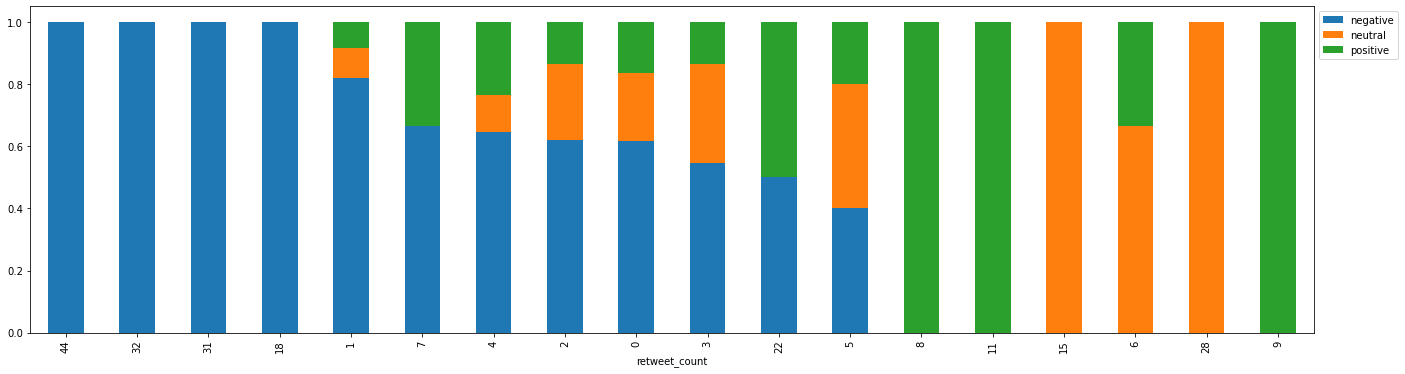

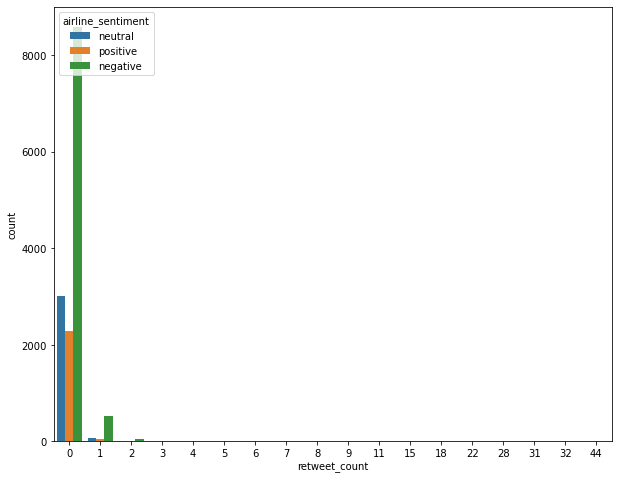

--------------------------------------------------------------------------------


In [19]:
for value in ['airline', 'day', 'hour', 'retweet_count']:
    stacked_barplot(data, value, 'airline_sentiment')

- Seems like United airlines has the highest proportion of negative tweets and virgin america has the least
- Most negative tweets get sent out on the weekend
- The proportions of negative tweets are high during after hours (after 5PM)
- Negative sentiment tweets are the ones which get retweeted a lot more compared to positive or neutral ones

- #### Length of tweets based on sentiment

Text(0.5, 0.98, 'Characters in message')

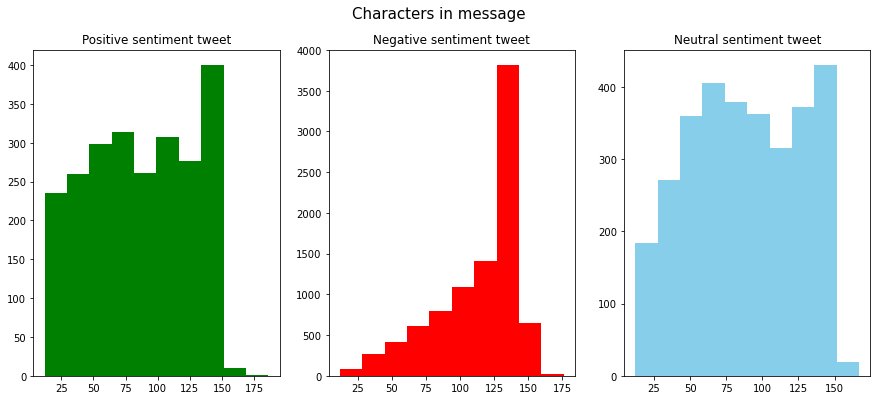

In [20]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6))

# Tweet length of postive tweets
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='g')
ax1.set_title('Positive sentiment tweet')

# Tweet length of negative tweets
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='r')
ax2.set_title('Negative sentiment tweet')

# Tweet length of neutral tweets
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='skyblue')
ax3.set_title('Neutral sentiment tweet')

# Set figure title
fig.suptitle('Characters in message', fontsize=15)

- Clearly neutral and positive tweets have a uniform distribution of lengths
- negative tweets tend to have left skew in their distribution and are shorter

- #### Number of words in a tweet based on sentiment

Text(0.5, 0.98, 'Words in message')

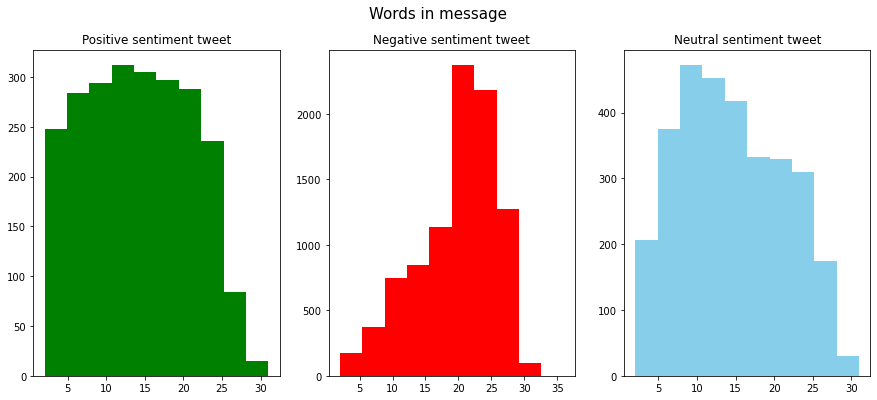

In [21]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,6))

# Tweet length of postive tweets
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='g')
ax1.set_title('Positive sentiment tweet')

# Tweet length of negative tweets
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='r')
ax2.set_title('Negative sentiment tweet')

# Tweet length of neutral tweets
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='skyblue')
ax3.set_title('Neutral sentiment tweet')

# Set figure title
fig.suptitle('Words in message', fontsize=15)

- Similar trend is observed in number of words in a tweet, neutral and positive tweets have a uniform distribution of word count
- negative tweets tend to be short

- #### Common words in all tweets

In [138]:
top = Counter([item for sublist in data['summary_token'] for item in sublist])
freq = pd.DataFrame(top.most_common(10))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Blues')

,Common_words,count
0,flight,4806
1,not,3884
2,get,2113
3,thank,1782
4,cancel,1056
5,service,992
6,delay,980
7,time,949
8,help,940
9,go,796


- As we can see that most tweets contain the word flight
- Since majority tweets are negative the word 'not' appears quite frequently

- #### Common words in positive tweets and wordcloud

In [139]:
Positive_sent = data[data['airline_sentiment']=='positive']
top = Counter([item for sublist in Positive_sent['summary_token'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(10))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,thank,1110
1,flight,441
2,get,254
3,great,233
4,,232
5,not,198
6,love,166
7,service,162
8,fly,153
9,make,153


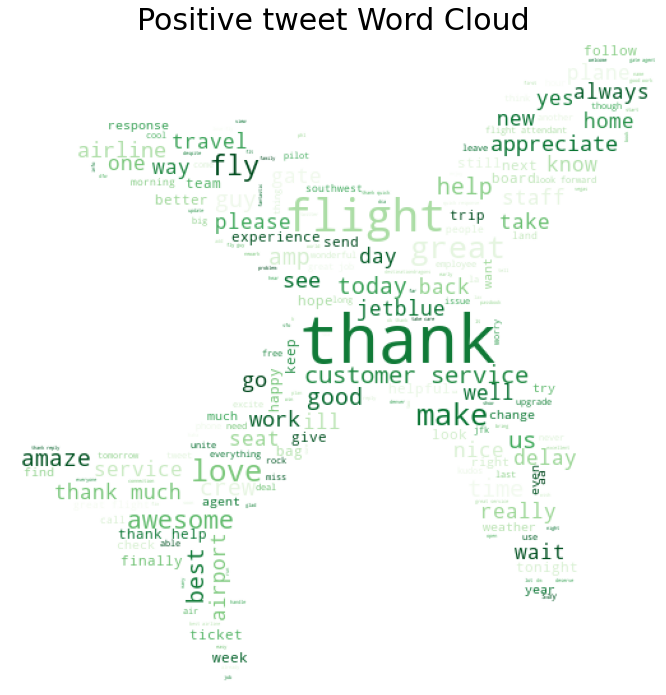

In [140]:
show_wordcloud(Positive_sent,'Positive tweet Word Cloud', 'Greens')

- As we can the positive tweets have the word like 'Thank' and 'great'

- #### Common words in negative tweets and wordcloud

In [141]:
Negative_sent = data[data['airline_sentiment']=='negative']
top = Counter([item for sublist in Negative_sent['summary_token'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(10))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,3573
1,not,3308
2,get,1516
3,cancel,920
4,delay,892
5,service,768
6,time,737
7,call,683
8,hold,674
9,wait,663


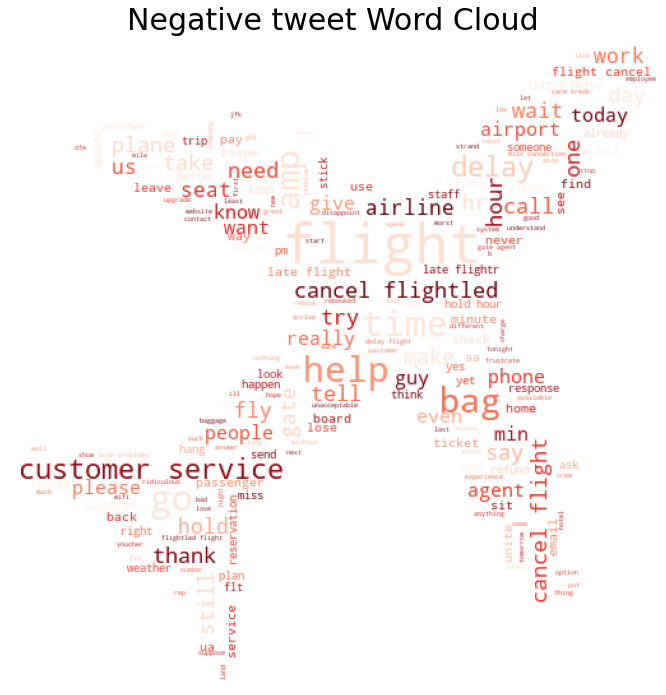

In [142]:
show_wordcloud(Negative_sent,'Negative tweet Word Cloud','Reds')

- The negative tweets contains words like 'cancel', 'bag', 'delay' etc.

- #### Common words in neutral tweets and wordcloud

In [143]:
Neutral_sent = data[data['airline_sentiment']=='neutral']
top = Counter([item for sublist in Neutral_sent['summary_token'] for item in sublist])
freq_neutral = pd.DataFrame(top.most_common(10))
freq_neutral.columns = ['Common_words','count']
freq_neutral.style.background_gradient(cmap='Greys')

,Common_words,count
0,flight,792
1,not,378
2,get,343
3,,269
4,thank,241
5,need,184
6,please,179
7,help,167
8,fly,164
9,go,146


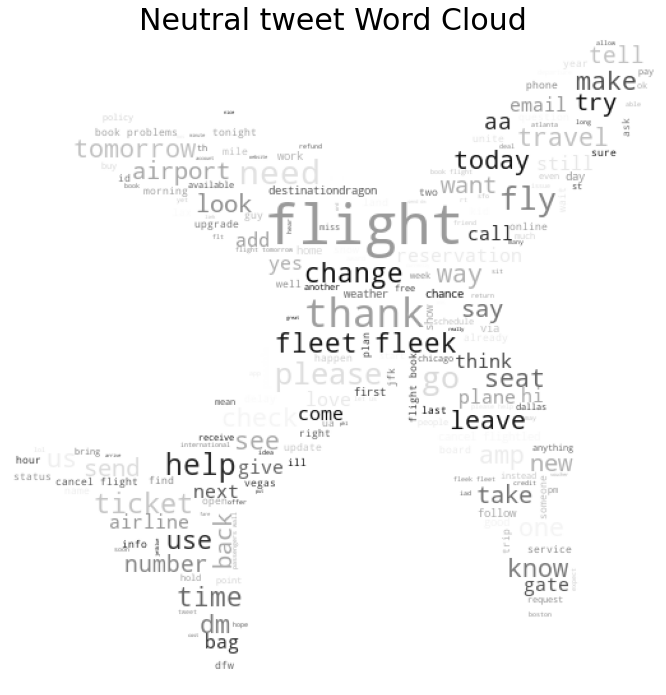

In [144]:
show_wordcloud(Neutral_sent,'Neutral tweet Word Cloud', 'Greys')

- The neutral tweets have words like 'flight', 'fly', 'gate' etc.

- #### Analyze negative reasons

In [145]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

- As we can see the most common reason amongst the negatives reason is bad customer service, followed by flight delays.

In [146]:
pd.crosstab(data.negativereason, data.airline_sentiment, margins=False)

airline_sentiment,negative
negativereason,
Bad Flight,580
Can't Tell,1190
Cancelled Flight,847
Customer Service Issue,2910
Damaged Luggage,74
Flight Attendant Complaints,481
Flight Booking Problems,529
Late Flight,1665
Lost Luggage,724


- As we can see that only negative tweets are the ones which have negative reaosn associated wuth the tweet

In [31]:
pd.crosstab(data.negativereason, data.airline, margins=True).style\
.highlight_max(color = 'lightblue', axis = 0)\
.highlight_max(color = 'navajowhite', axis = 1)

airline,American,Delta,Southwest,US Airways,United,Virgin America,All
negativereason,,,,,,,
Bad Flight,87,64,90,104,216,19,580
Can't Tell,198,186,159,246,379,22,1190
Cancelled Flight,246,51,162,189,181,18,847
Customer Service Issue,768,199,391,811,681,60,2910
Damaged Luggage,12,11,14,11,22,4,74
Flight Attendant Complaints,87,60,38,123,168,5,481
Flight Booking Problems,130,44,61,122,144,28,529
Late Flight,249,269,152,453,525,17,1665
Lost Luggage,149,57,90,154,269,5,724


- Most of the negative reasons are tweeted for United airlines

In [32]:
pd.crosstab(data.negativereason, data.airline, margins=False).style\
.highlight_max(color = 'lightcoral', axis = 0)\
.highlight_min(color = 'lightgreen', axis = 0)

airline,American,Delta,Southwest,US Airways,United,Virgin America
negativereason,,,,,,
Bad Flight,87,64,90,104,216,19
Can't Tell,198,186,159,246,379,22
Cancelled Flight,246,51,162,189,181,18
Customer Service Issue,768,199,391,811,681,60
Damaged Luggage,12,11,14,11,22,4
Flight Attendant Complaints,87,60,38,123,168,5
Flight Booking Problems,130,44,61,122,144,28
Late Flight,249,269,152,453,525,17
Lost Luggage,149,57,90,154,269,5


- On looking closely, we can see what is the most common negative reason for each airline
- Customer service issues are pretty widespread major issue across all airlines
- The least occuring negative reason is damaged luggage

In [33]:
pd.crosstab(data.negativereason, data.airline, margins=False).style\
.highlight_max(color = 'lightcoral', axis = 1)\
.highlight_min(color = 'lightgreen', axis = 1)

airline,American,Delta,Southwest,US Airways,United,Virgin America
negativereason,,,,,,
Bad Flight,87,64,90,104,216,19
Can't Tell,198,186,159,246,379,22
Cancelled Flight,246,51,162,189,181,18
Customer Service Issue,768,199,391,811,681,60
Damaged Luggage,12,11,14,11,22,4
Flight Attendant Complaints,87,60,38,123,168,5
Flight Booking Problems,130,44,61,122,144,28
Late Flight,249,269,152,453,525,17
Lost Luggage,149,57,90,154,269,5


- For each reason category, United has the largest share of each negative reasons followed by US airways and then american
- Virign America has least negative reason for their service

In [34]:
pd.crosstab(data.negativereason, data.day, margins=False).style\
.highlight_max(color = 'lightcoral', axis = 1)\
.highlight_min(color = 'lightgreen', axis = 1)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
negativereason,,,,,,,
Bad Flight,66,91,63,126,65,114,55
Can't Tell,122,285,128,239,110,208,98
Cancelled Flight,45,163,131,268,46,158,36
Customer Service Issue,231,676,346,718,199,518,222
Damaged Luggage,5,15,7,15,5,17,10
Flight Attendant Complaints,47,84,50,124,35,101,40
Flight Booking Problems,52,117,47,99,57,100,57
Late Flight,202,281,173,454,182,244,129
Lost Luggage,53,187,77,169,34,132,72


- Majority of negative reasons are tweted on Sundays and least on Wednesday/Thursday

In [35]:
pd.crosstab(data.negativereason, data.hour, margins=False).style\
.highlight_max(color = 'lightcoral', axis = 1)\
.highlight_min(color = 'lightgreen', axis = 1)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
negativereason,,,,,,,,,,,,,,,,,,,,,,,,
Bad Flight,10,3,3,10,15,20,34,21,40,32,36,46,29,34,37,25,35,34,28,34,20,16,13,5
Can't Tell,14,15,11,17,33,32,54,56,59,75,83,86,47,77,86,81,57,60,54,64,52,32,21,24
Cancelled Flight,11,3,7,17,20,33,36,51,50,67,45,48,57,63,53,41,37,31,43,36,35,28,17,18
Customer Service Issue,27,29,46,51,74,108,138,168,206,209,168,169,163,187,180,145,131,108,156,124,115,96,72,40
Damaged Luggage,0,3,0,1,2,2,1,2,2,11,1,4,3,4,9,4,1,5,5,6,4,1,2,1
Flight Attendant Complaints,4,3,11,3,18,16,20,24,22,44,32,35,22,29,27,23,22,22,20,26,24,15,14,5
Flight Booking Problems,2,3,3,5,13,18,16,28,34,36,41,44,28,40,36,30,18,23,26,22,22,22,12,7
Late Flight,13,7,11,21,38,61,63,88,102,87,89,94,85,75,111,107,111,112,99,116,70,51,32,22
Lost Luggage,15,13,14,17,21,20,25,28,30,44,38,29,41,42,38,34,38,42,40,45,40,28,27,15


- As we can see majority negative tweets are happening 9AM - 2PM
- Minimum number of negative reasons are happening between midnight - 3AM

- ## Model development

- ### Data preperation 

- #### Drop everything else apart from clean tweets and sentiments

In [36]:
tweets = data[['airline_sentiment','summary']]

- #### Create a target vector

In [37]:
sentiment = tweets['airline_sentiment']

- ### Creating dataset using countvectorizer

- #### feature set using countvectorizer

In [100]:
# Vectorization (Convert text data to numbers)
bow_vec = CountVectorizer(max_features=1000)                # Keep only 2000 features as number of features will increase the processing time.
data_features_cv = bow_vec.fit_transform(tweets['summary'])

data_features_cv = data_features_cv.toarray()                        # Convert the data features to array.

#Peek at the shape of the data
data_features_cv.shape

(14640, 1000)

- #### Split the dataset into test and training sets

In [101]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(data_features_cv, 
                                                                sentiment, 
                                                                test_size=0.3, 
                                                                random_state=42)

- ### Creating dataset using TF-IDF

- #### feature set using TF-IDF

In [102]:
# Vectorization (Convert text data to numbers)
tfidfvec = TfidfVectorizer(max_features=1000)                # Keep only 2000 features as number of features will increase the processing time.
data_features_tf = tfidfvec.fit_transform(tweets['summary'])
 
data_features_tf = data_features_tf.toarray()                        # Convert the data features to array.

#Peek at the shape of the data
data_features_tf.shape

(14640, 1000)

- #### Split the dataset into test and training sets

In [103]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(data_features_tf, 
                                                                sentiment, 
                                                                test_size=0.3, 
                                                                random_state=42)

- ### Training Countvectorizer data with Random Forest

- #### Explore the impact of number of estimators on the accuracy of the model

In [104]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, n_jobs=4)
    scores = cross_val_score(clf, X_train_cv, y_train_cv, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

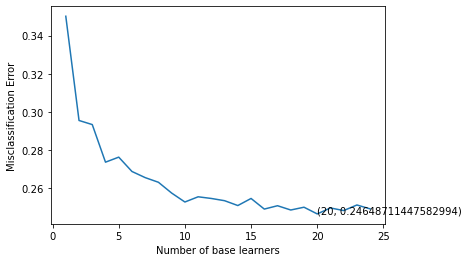

In [105]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- #### Using the best model from our prior analysis and evaluate it's performance on test dataset

In [106]:
# Training the best model and calculating accuracy on test data .
rf_tuned_cv = RandomForestClassifier(n_estimators = optimal_learners)
# Fit the model on the training data
rf_tuned_cv.fit(X_train_cv, y_train_cv)
# Evalaute model performance on the test data
print('The accuracy score of the tuned RF model on the train dataset :',rf_tuned_cv.score(X_train_cv, y_train_cv))
# get the model predictions from test dataset
rf_tuned_cv_pred = rf_tuned_cv.predict(X_test_cv)

The accuracy score of the tuned RF model on the train dataset : 0.9830210772833724


Text(69.0, 0.5, 'Actual')

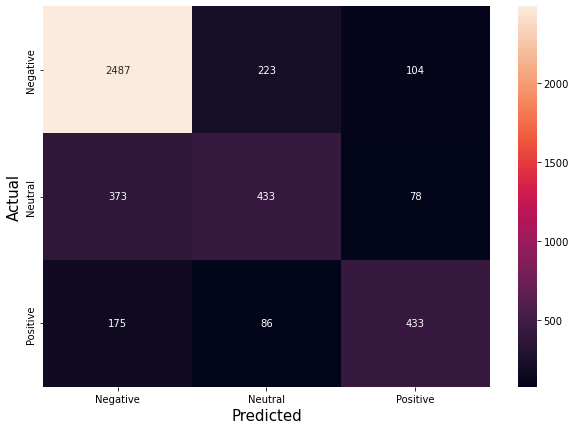

In [107]:
conf_mat = confusion_matrix(y_test_cv, rf_tuned_cv_pred)

df_cm = pd.DataFrame(conf_mat, 
                     index = [i for i in ['Negative', 'Neutral', 'Positive']],
                     columns = [i for i in ['Negative', 'Neutral', 'Positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

In [108]:
print(classification_report(y_test_cv, rf_tuned_cv_pred))

              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      2814
     neutral       0.58      0.49      0.53       884
    positive       0.70      0.62      0.66       694

    accuracy                           0.76      4392
   macro avg       0.70      0.67      0.68      4392
weighted avg       0.75      0.76      0.76      4392



/home/mopsie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


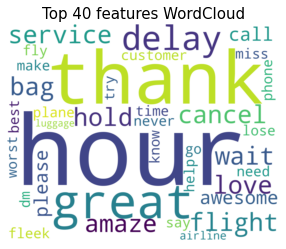

In [109]:
all_features = bow_vec.get_feature_names()                                #Instantiate the feature from the vectorizer
top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=rf_tuned_cv.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
wordcloud_cv_rf = wordcloud.WordCloud(background_color="white",
                                width=1500, height=1200).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud_cv_rf, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=15)
plt.axis("off")
plt.show()

- As we can see that the training data has overfit the model.
    - The training accuracy is 98% and test accuracy is 76%
- Next we will try TF-IDF vectorizer with random forest

- ### Training TF-IDF data with Random Forest

- #### Explore the impact of number of estimators on the accuracy of the model

In [110]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]

# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, n_jobs=4)
    scores = cross_val_score(clf, X_train_tf, y_train_tf, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

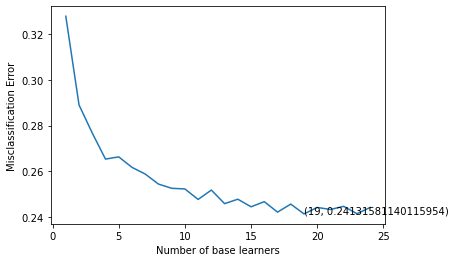

In [111]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

- #### Using the best model from our prior analysis and evaluate it's performance on test dataset

In [112]:
# Training the best model and calculating accuracy on test data .
rf_tuned_tf = RandomForestClassifier(n_estimators = optimal_learners)
# Fit the model on the training data
rf_tuned_tf.fit(X_train_tf, y_train_tf)
# Evalaute model performance on the test data
print('The accuracy score of the tuned RF model on the train dataset :',rf_tuned_tf.score(X_train_tf, y_train_tf))
# get the model predictions from test dataset
rf_tuned_tf_pred = rf_tuned_tf.predict(X_test_tf)

The accuracy score of the tuned RF model on the train dataset : 0.9829234972677595


Text(69.0, 0.5, 'Actual')

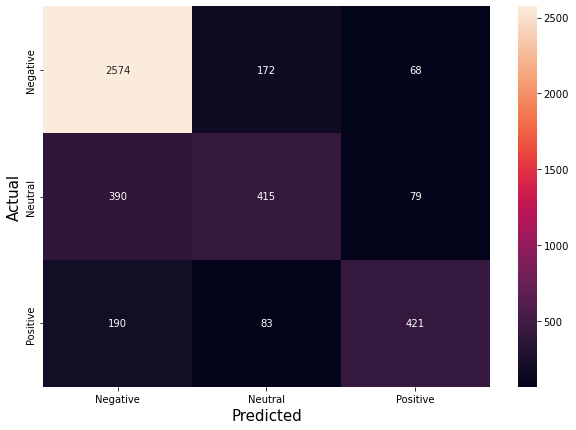

In [113]:
conf_mat = confusion_matrix(y_test_tf, rf_tuned_tf_pred)

df_cm = pd.DataFrame(conf_mat, 
                     index = [i for i in ['Negative', 'Neutral', 'Positive']],
                     columns = [i for i in ['Negative', 'Neutral', 'Positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

In [114]:
print(classification_report(y_test_tf, rf_tuned_tf_pred))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      2814
     neutral       0.62      0.47      0.53       884
    positive       0.74      0.61      0.67       694

    accuracy                           0.78      4392
   macro avg       0.73      0.66      0.69      4392
weighted avg       0.76      0.78      0.77      4392



/home/mopsie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


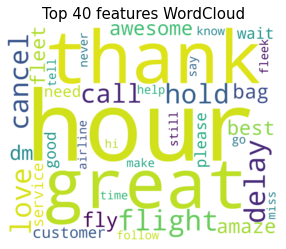

In [115]:
all_features = tfidfvec.get_feature_names()                                #Instantiate the feature from the vectorizer
top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=rf_tuned_tf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
wordcloud_tf_rf = wordcloud.WordCloud(background_color="white",
                                width=1500, height=1200).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud_tf_rf, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=15)
plt.axis("off")
plt.show()

- As we can see that the training data has overfit the model.
    - The training accuracy is 98% and test accuracy is 78%
- Next we will try count vectorizer with XGBoost

- ### Training Countvectorizer data with XGBoost

- #### Creating a XGBoost model with 100 estimators

In [116]:
## Define XGBoost classifier
xgb_cv = XGBClassifier(random_state=1, eval_metric="logloss", 
                       n_estimators=100, n_jobs=-1)

# Define a label encoder and transform the training sentiment
le = LabelEncoder()
y_train_cv_le = le.fit_transform(y_train_cv)

# fit the model to training dataset
xgb_cv.fit(X_train_cv, y_train_cv_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, ...)

- #### Evaluating model performance

In [117]:
# Evalaute model performance on the training data
y_pred = xgb_cv.predict(X_train_cv)
predictions = [round(value) for value in y_pred]
print('The accuracy score of the tuned RF model on the training dataset :',
      metrics.accuracy_score(y_train_cv_le, predictions))

The accuracy score of the tuned RF model on the training dataset : 0.8375292740046838


In [118]:
y_pred = xgb_cv.predict(X_test_cv)
xgb_cv_pred = le.inverse_transform([round(value) for value in y_pred])

Text(69.0, 0.5, 'Actual')

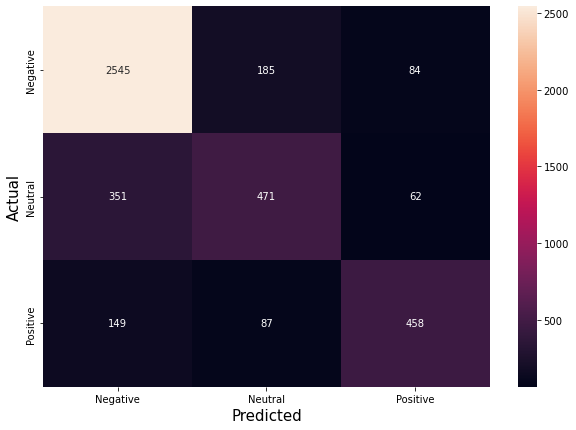

In [119]:
conf_mat = confusion_matrix(y_test_cv, xgb_cv_pred)

df_cm = pd.DataFrame(conf_mat, 
                     index = [i for i in ['Negative', 'Neutral', 'Positive']],
                     columns = [i for i in ['Negative', 'Neutral', 'Positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

In [120]:
print(classification_report(y_test_cv, xgb_cv_pred))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      2814
     neutral       0.63      0.53      0.58       884
    positive       0.76      0.66      0.71       694

    accuracy                           0.79      4392
   macro avg       0.74      0.70      0.72      4392
weighted avg       0.78      0.79      0.78      4392



/home/mopsie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


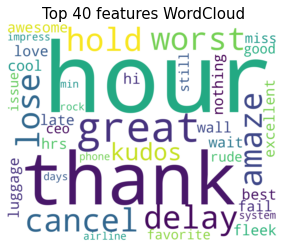

In [121]:
all_features = bow_vec.get_feature_names()                                #Instantiate the feature from the vectorizer
top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=xgb_cv.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
wordcloud_cv_rf = wordcloud.WordCloud(background_color="white",
                                      width=1500, height=1200).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud_cv_rf, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=15)
plt.axis("off")
plt.show()

- As we can see that the training data is slight overfit
    - The training accuracy is 83% and test accuracy is 79%
- Next we will try TF-IDF vectorizer with XGBoost

- ### Training TFIDF data with XGBoost

- #### Creating a XGBoost model with 100 estimators

In [122]:
## Define XGBoost classifier
xgb_tf = XGBClassifier(random_state=1, eval_metric="logloss", 
                       n_estimators=100, n_jobs=-1)

# Define a label encoder and transform the training sentiment
le = LabelEncoder()
y_train_tf_le = le.fit_transform(y_train_tf)

# fit the model to training dataset
xgb_tf.fit(X_train_tf, y_train_tf_le)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, ...)

- #### Evaluating model performance

In [123]:
# Evalaute model performance on the training data
y_pred = xgb_tf.predict(X_train_cv)
predictions = [round(value) for value in y_pred]
print('The accuracy score of the tuned RF model on the training dataset :',
      metrics.accuracy_score(y_train_tf_le, predictions))

The accuracy score of the tuned RF model on the training dataset : 0.7809328649492584


In [124]:
y_pred = xgb_tf.predict(X_test_cv)
xgb_tf_pred = le.inverse_transform([round(value) for value in y_pred])

Text(69.0, 0.5, 'Actual')

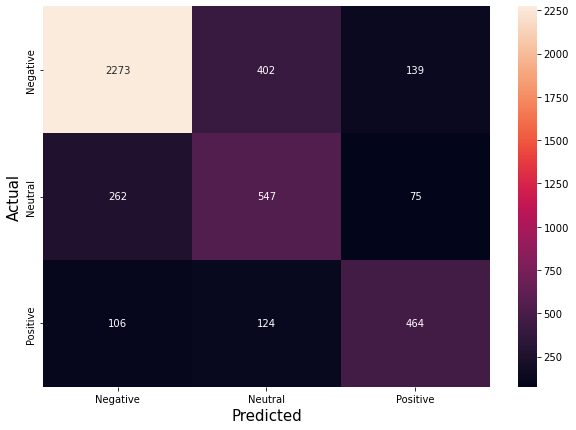

In [125]:
conf_mat = confusion_matrix(y_test_tf, xgb_tf_pred)

df_cm = pd.DataFrame(conf_mat, 
                     index = [i for i in ['Negative', 'Neutral', 'Positive']],
                     columns = [i for i in ['Negative', 'Neutral', 'Positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

In [126]:
print(classification_report(y_test_tf, xgb_tf_pred))

              precision    recall  f1-score   support

    negative       0.86      0.81      0.83      2814
     neutral       0.51      0.62      0.56       884
    positive       0.68      0.67      0.68       694

    accuracy                           0.75      4392
   macro avg       0.68      0.70      0.69      4392
weighted avg       0.76      0.75      0.75      4392



/home/mopsie/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


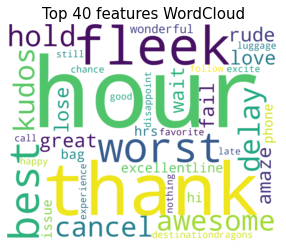

In [127]:
all_features = tfidfvec.get_feature_names()                                #Instantiate the feature from the vectorizer
top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=xgb_tf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
wordcloud_cv_rf = wordcloud.WordCloud(background_color="white",
                                      width=1500, height=1200).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud_cv_rf, interpolation='bilinear')
plt.figure(1, figsize=(40, 40), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=15)
plt.axis("off")
plt.show()

- As we can see that the training data has slight overfit on the model.
    - The training accuracy is 78% and test accuracy is 75%

## Data Summary

- #### Data description <br>

    - This dataset contains the tweets about the airlines
    - The dataset has 15 columns

- #### Data Cleaning <br>
    
    - We are dropping few columns as we believe that they do not add value to our analysis going forward
        1. tweet_id
        2. airline_sentiment_confidence
        3. negativereason_confidence
        4. airline_sentiment_gold
        5. name
        6. negativereason_gold
        7. tweet_coord
        8. tweet_location
        9. user_timezone
     
    - In the remaining dataset we have negative_reason column which has values missing
         - This can be due to the fact that negative tweets are the ones which have negative_reason associated with them
    - We are keeping the tweet_created column to see if we can find any information about the day of the week and time of the data it was created and it's correlation with sentiment
        - We added two new columns: The day of the week when tweet was created and what hour of the day it was created
    
- #### Observations from EDA <br>
    - Majority tweets in the data are negative, followed by neutral and positive tweets
        - Neutral and positive tweets have a uniform distribution of lengths
        - Negative tweets tend to have left skew in their distribution and are shorter
    - Majoirty tweets are for United airlines, followed by US airways and then by American
    - 4 most active days of tweeting are Sunday, Monday, Tuesday and Saturday
    - As we can see that 60% of tweets happen in the 8AM - 3PM 
        - Rest of the 25% tweet happen between 8PM - 6AM and and 15% happen between 4PM - 7PM 
    - Majority tweets do not get retweeted
        - Negative sentiment tweets are the ones which get retweeted a lot more compared to positive or neutral ones
    - We can see what is the most common negative reason for each airline
        - Customer service issues are pretty widespread major issue across all airlines
        - The least occuring negative reason is damaged luggage
        - For each reason category, United has the largest share of each negative reasons followed by US airways and then american
        - Virign America has least negative reason for their service
        - Majority of negative reasons are tweted on Sundays and least on Wednesday/Thursday
        - As we can see majority negative tweets are happening 9AM - 2PM
        - Minimum number of negative reasons are happening between midnight - 3AM

## Model Development

- We used two different vectorizers
    - Count Vectorizer
    - TF-IDF Vectorizer
- We analyzed the vectorized tweets with 
    - Random Forest 
    - XGBoost algorithms
- We evaluated the model performance using confusion matrix, accuracy, f1-score and recall
- We found that the 4 models we tested overfit the training data, random forest had most issues with overfitting training data compared to XGBoost has
- Our recommendation is to use **countvectorizer based XGBoost model** to make predictions on tweet sentiments

## Business Recommendations

- The model to process tweets and predict sentiment can be a powerful tool for airlines to be pro-active in providing customer support
- We have developed a model which can predict the sentiment of a tweet with 78% accuracy
    - The model is significantly accurate in predicting negative sentiment in a tweet
    - It can also predict positive sentiment with significant accuracy as well
    - The model has trouble identifying neutral tweets
- Whenever there is a neagtive_reason obviously a negative tweet. The neagtive reason helps to better improve the customer support

- The most common negative reason is the bad customer service followed by delayed flight
    - US airways, American and United have a significant share in bad customer serivice based negative reasons
    - United airline struggles delayed flight issues
    - Hence, investing in better customer support would greatly improve the airline reputation
    - To reduce the number of delayed flights require a more infrastructural change and is a bigger investment

- Most of the negative tweets happen on the weekend, indicating that there might be staff shortages that the airlines deal with. This can be resolved by hiring staff to support the high travel days of the week

- Most of the negative tweets also happen during the 9AM - 3PM timeframe indicating the workload peaks then and later in the wrokday is also when employees are getting burnt out.
    - Implementing breaks for staff might help imporve airline reputation
    